<a href="https://colab.research.google.com/github/anassaifi775/Real-World-Object-Detector/blob/main/12_Real_World_Computer_Vision__Building_a_Object_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haar Cascades

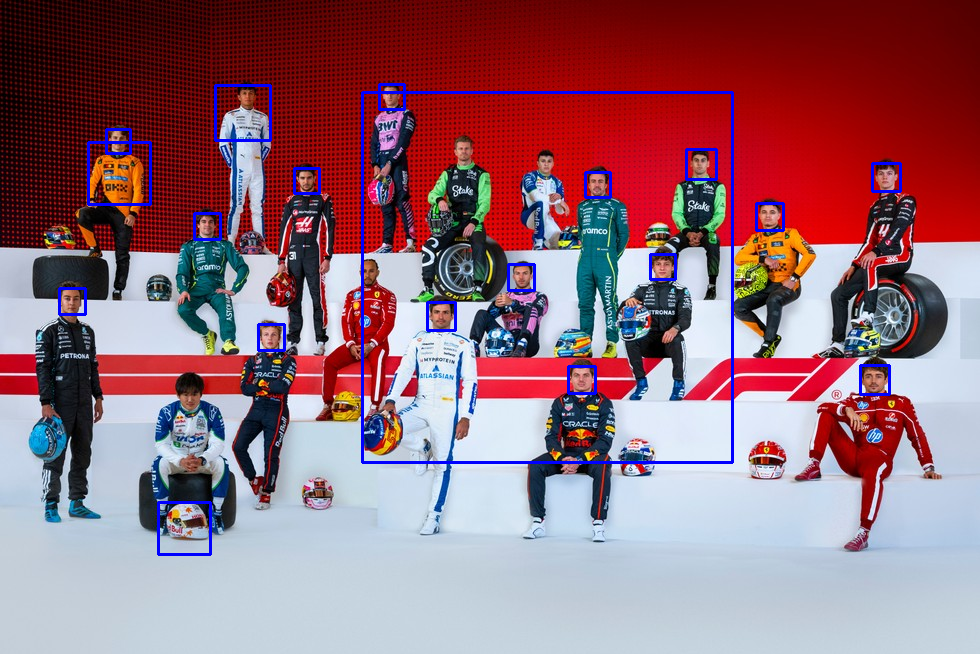

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
img = cv2.imread("/content/F1-2025-driver-line-up-534c464.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.2, 1)


for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)

# Playing with Yolo v8

### 0. Setup

In [ ]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.2/107.7 GB disk)


### 1. Predict

YOLOv8 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLOv8 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
!yolo predict model=yolov8n.pt source='https://images.immediate.co.uk/production/volatile/sites/3/2025/03/F1-2025-driver-line-up-534c464.jpg?quality=90&resize=980,654'

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://images.immediate.co.uk/production/volatile/sites/3/2025/03/F1-2025-driver-line-up-534c464.jpg locally at F1-2025-driver-line-up-534c464.jpg
image 1/1 /content/F1-2025-driver-line-up-534c464.jpg: 448x640 21 persons, 441.8ms
Speed: 10.6ms preprocess, 441.8ms inference, 45.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


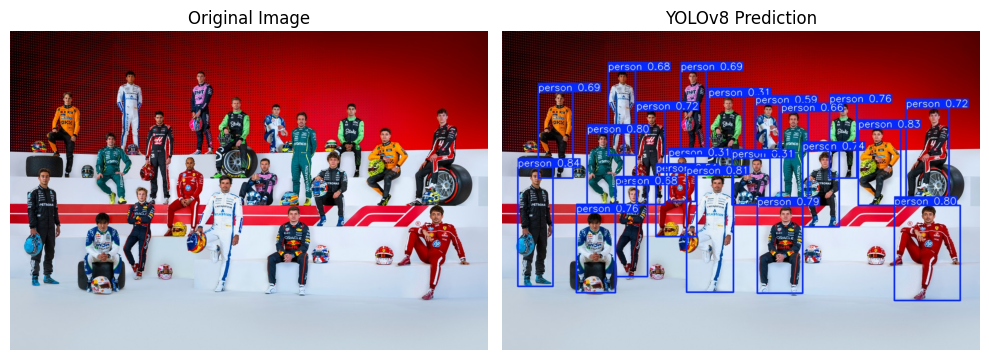

In [ ]:
import matplotlib.pyplot as plt

img1 = cv2.imread("/content/F1-2025-driver-line-up-534c464.jpg")
img2 = cv2.imread("/content/runs/detect/predict/F1-2025-driver-line-up-534c464.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the images in the subplots
axes[0].imshow(img1_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off') # Hide axes

axes[1].imshow(img2_rgb)
axes[1].set_title("YOLOv8 Prediction")
axes[1].axis('off') # Hide axes

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

# Real World Object Detector

1- It will only work locally like in vs code and does not work in collab because google collab doesn't allow camera access and we can't use opencv.


In [ ]:
from ultralytics import YOLO
import cv2
#from google.colab.patches import cv2_imshow
import numpy as np

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Open the default camera
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Error: Can't receive frame (stream end?). Exiting ...")
            break

        # Perform object detection on the frame
        results = model(frame, verbose=False) # Set verbose=False to reduce output

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLO Detection", annotated_frame)


        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()

Error: Could not open camera.
